<a href="https://colab.research.google.com/github/jx-dohwan/Natural-Language-Processing-using-Transformers/blob/main/CH11_future_direction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install transformers==4.24.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 24.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.25.1
    Uninstalling transformers-4.25.1:
      Successfully uninstalled transformers-4.25.1


# 향후 방향
- 새로 부상하고 있는 흥미진진한 분야는 텍스트, 이미지, 오디오 같이 여러 도메인에 걸친 입력을 모델링하는 멀티모달 트랜스포머이다.

## 1. 트랜스포머의 확장
- 

In [5]:
model_data = [
    {'date': '12-06-2017', 'name': 'Transformer', 'size': 213*1e6},
    {'date': '11-06-2018', 'name': 'GPT', 'size': 110*1e6},
    {'date': '11-10-2018', 'name': 'BERT', 'size': 340*1e6},
    {'date': '14-02-2019', 'name': 'GPT-2', 'size': 1.5*1e9},
    {'date': '23-10-2019', 'name': 'T5', 'size': 11*1e9},
    {'date': '17-09-2019', 'name': 'Megatron', 'size': 8.3*1e9},
    {'date': '13-02-2020', 'name': 'Turing-NLG', 'size': 17*1e9},
    {'date': '30-06-2020', 'name': 'GShard', 'size': 600*1e9},
    {'date': '28-05-2020', 'name': 'GPT-3', 'size': 175*1e9},
    {'date': '11-01-2021', 'name': 'Switch-C', 'size': 1.571*10e12},
]

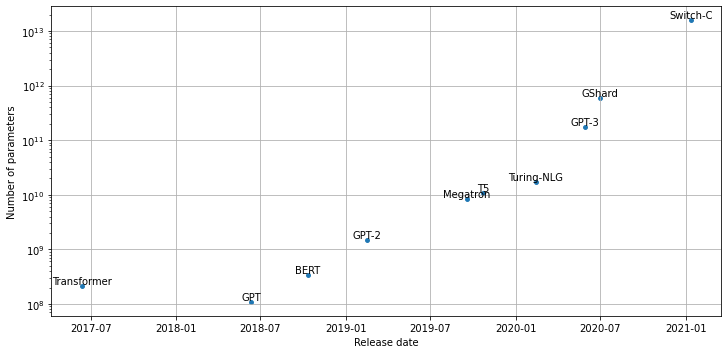

In [6]:
# 중요 트랜스포머 아키텍처의 파라미터 개수
import pandas as pd
import matplotlib.pyplot as plt

def label_point(x, y, val, ax):
    a = pd.concat({"x": x, "y": y, "val": val}, axis=1)
    for i, point in a.iterrows():
        ax.text(
            point["x"],
            point["y"],
            str(point["val"]),
            horizontalalignment="center",
            verticalalignment="bottom",
        )


df_lm = pd.DataFrame.from_records(model_data)
df_lm["date"] = pd.to_datetime(df_lm["date"], dayfirst=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df_lm.plot(x="date", y="size", kind="scatter", s=15, ax=ax)
ax.set_yscale("log")
label_point(df_lm["date"], df_lm["size"], df_lm["name"], ax)
ax.set_xlabel("Release date")
ax.set_ylabel("Number of parameters")
ax.grid(True)
plt.subplots_adjust(top=1.2)
plt.show()
     

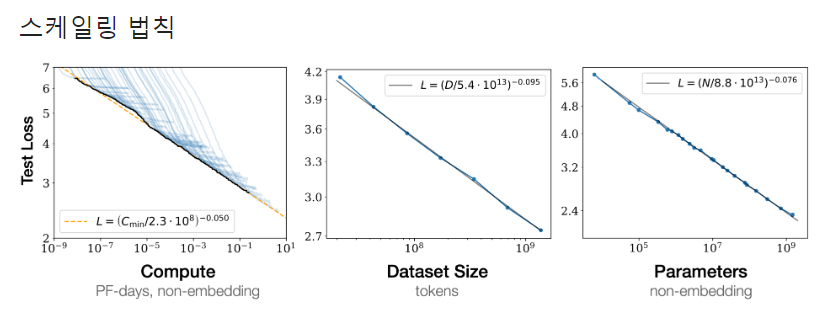

#### 성능과 규모의 관계
- 크기가 고정된 데이터셋에서 성능을 향상하기 위해 구조 변경이나 하이퍼파라미터 최적화애 초점을 맞춘다.
- 하지만 규모의 법칙의 의하면 모델의 크기, 컴퓨팅 예산, 데이터셋 크기를 동시에 증가시키는 것이 더 나은 모델을 만드는 데 생산적이다

#### 거듭 제곱을 법칙
- 테스트 손실 L은 모델의 크기, 컴퓨팅 예산, 데이터셋 크기와 여러 자리수에서 거듭제곱 관계가 있다.
- 이 거듭제곱 법칙은 손실 곡선의 초기 부분 곡선을 연장해서 훈련을 더 오래 수행할 때 얻게 될 손실의 근사치를 추정할 수 있다는 점에서 매력적이다.

#### 샘플 효율성
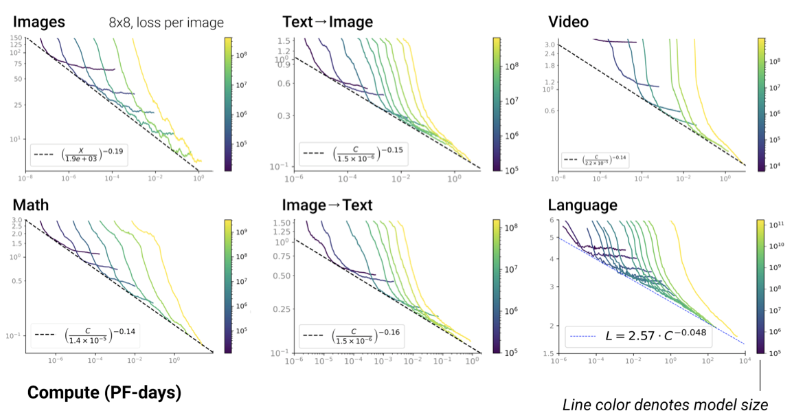

- 대규모 모델은 더 적은 횟수의 훈련 단계로도 소규모 모델과 동일한 성능을 냅니다.
- 일정 횟수의 훈련 단계를 거친 후 손실 곡선이 평탄해지는 영역을 비교함녀 알 수 있다.
- 이 비교는 단순히 모델을 확장한 것에 비해 성능 개선이 크지 않음을 나타낸다.
- 거듭제곱 법칙이 트랜스포머 언어 모델의 일반적인 속성인지 여부는 아직 밝혀지지 않았다.
- 현재로서는 비용이 많이 드는 대규 모델을 명시적으로 훈련하지 않고 성능을 예측하는 도구로 규모의 법칙을 이용한다. 
- 하지만 규모 확장은 말처럼 그렇게 쉽지 않다.

### 2) 규모 확장의 어려움

#### 인프라
- 